In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
nfl2022 = pd.read_csv('/Users/wendychiang/Desktop/2022NFL.csv')

In [3]:
nfl2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Team1            566 non-null    object
 1   Team1_Off_rank   566 non-null    int64 
 2   Team1_Def_rank   566 non-null    int64 
 3   Location         566 non-null    object
 4   Team2            566 non-null    object
 5   Team2_Off_rank   566 non-null    int64 
 6   Team2_Def_rank   566 non-null    int64 
 7   Team1_Passing    566 non-null    int64 
 8   Team1_Rushing    566 non-null    int64 
 9   Team1_Turnovers  566 non-null    int64 
 10  Team2_Passing    566 non-null    int64 
 11  Team2_Rushing    566 non-null    int64 
 12  Team2_Turnovers  566 non-null    int64 
 13  Result           566 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 62.0+ KB


In [4]:
nfl2022.isnull().sum()

Team1              0
Team1_Off_rank     0
Team1_Def_rank     0
Location           0
Team2              0
Team2_Off_rank     0
Team2_Def_rank     0
Team1_Passing      0
Team1_Rushing      0
Team1_Turnovers    0
Team2_Passing      0
Team2_Rushing      0
Team2_Turnovers    0
Result             0
dtype: int64

In [6]:
nfl2022['Result'].value_counts()/float(len(nfl2022))

1    0.503534
0    0.496466
Name: Result, dtype: float64

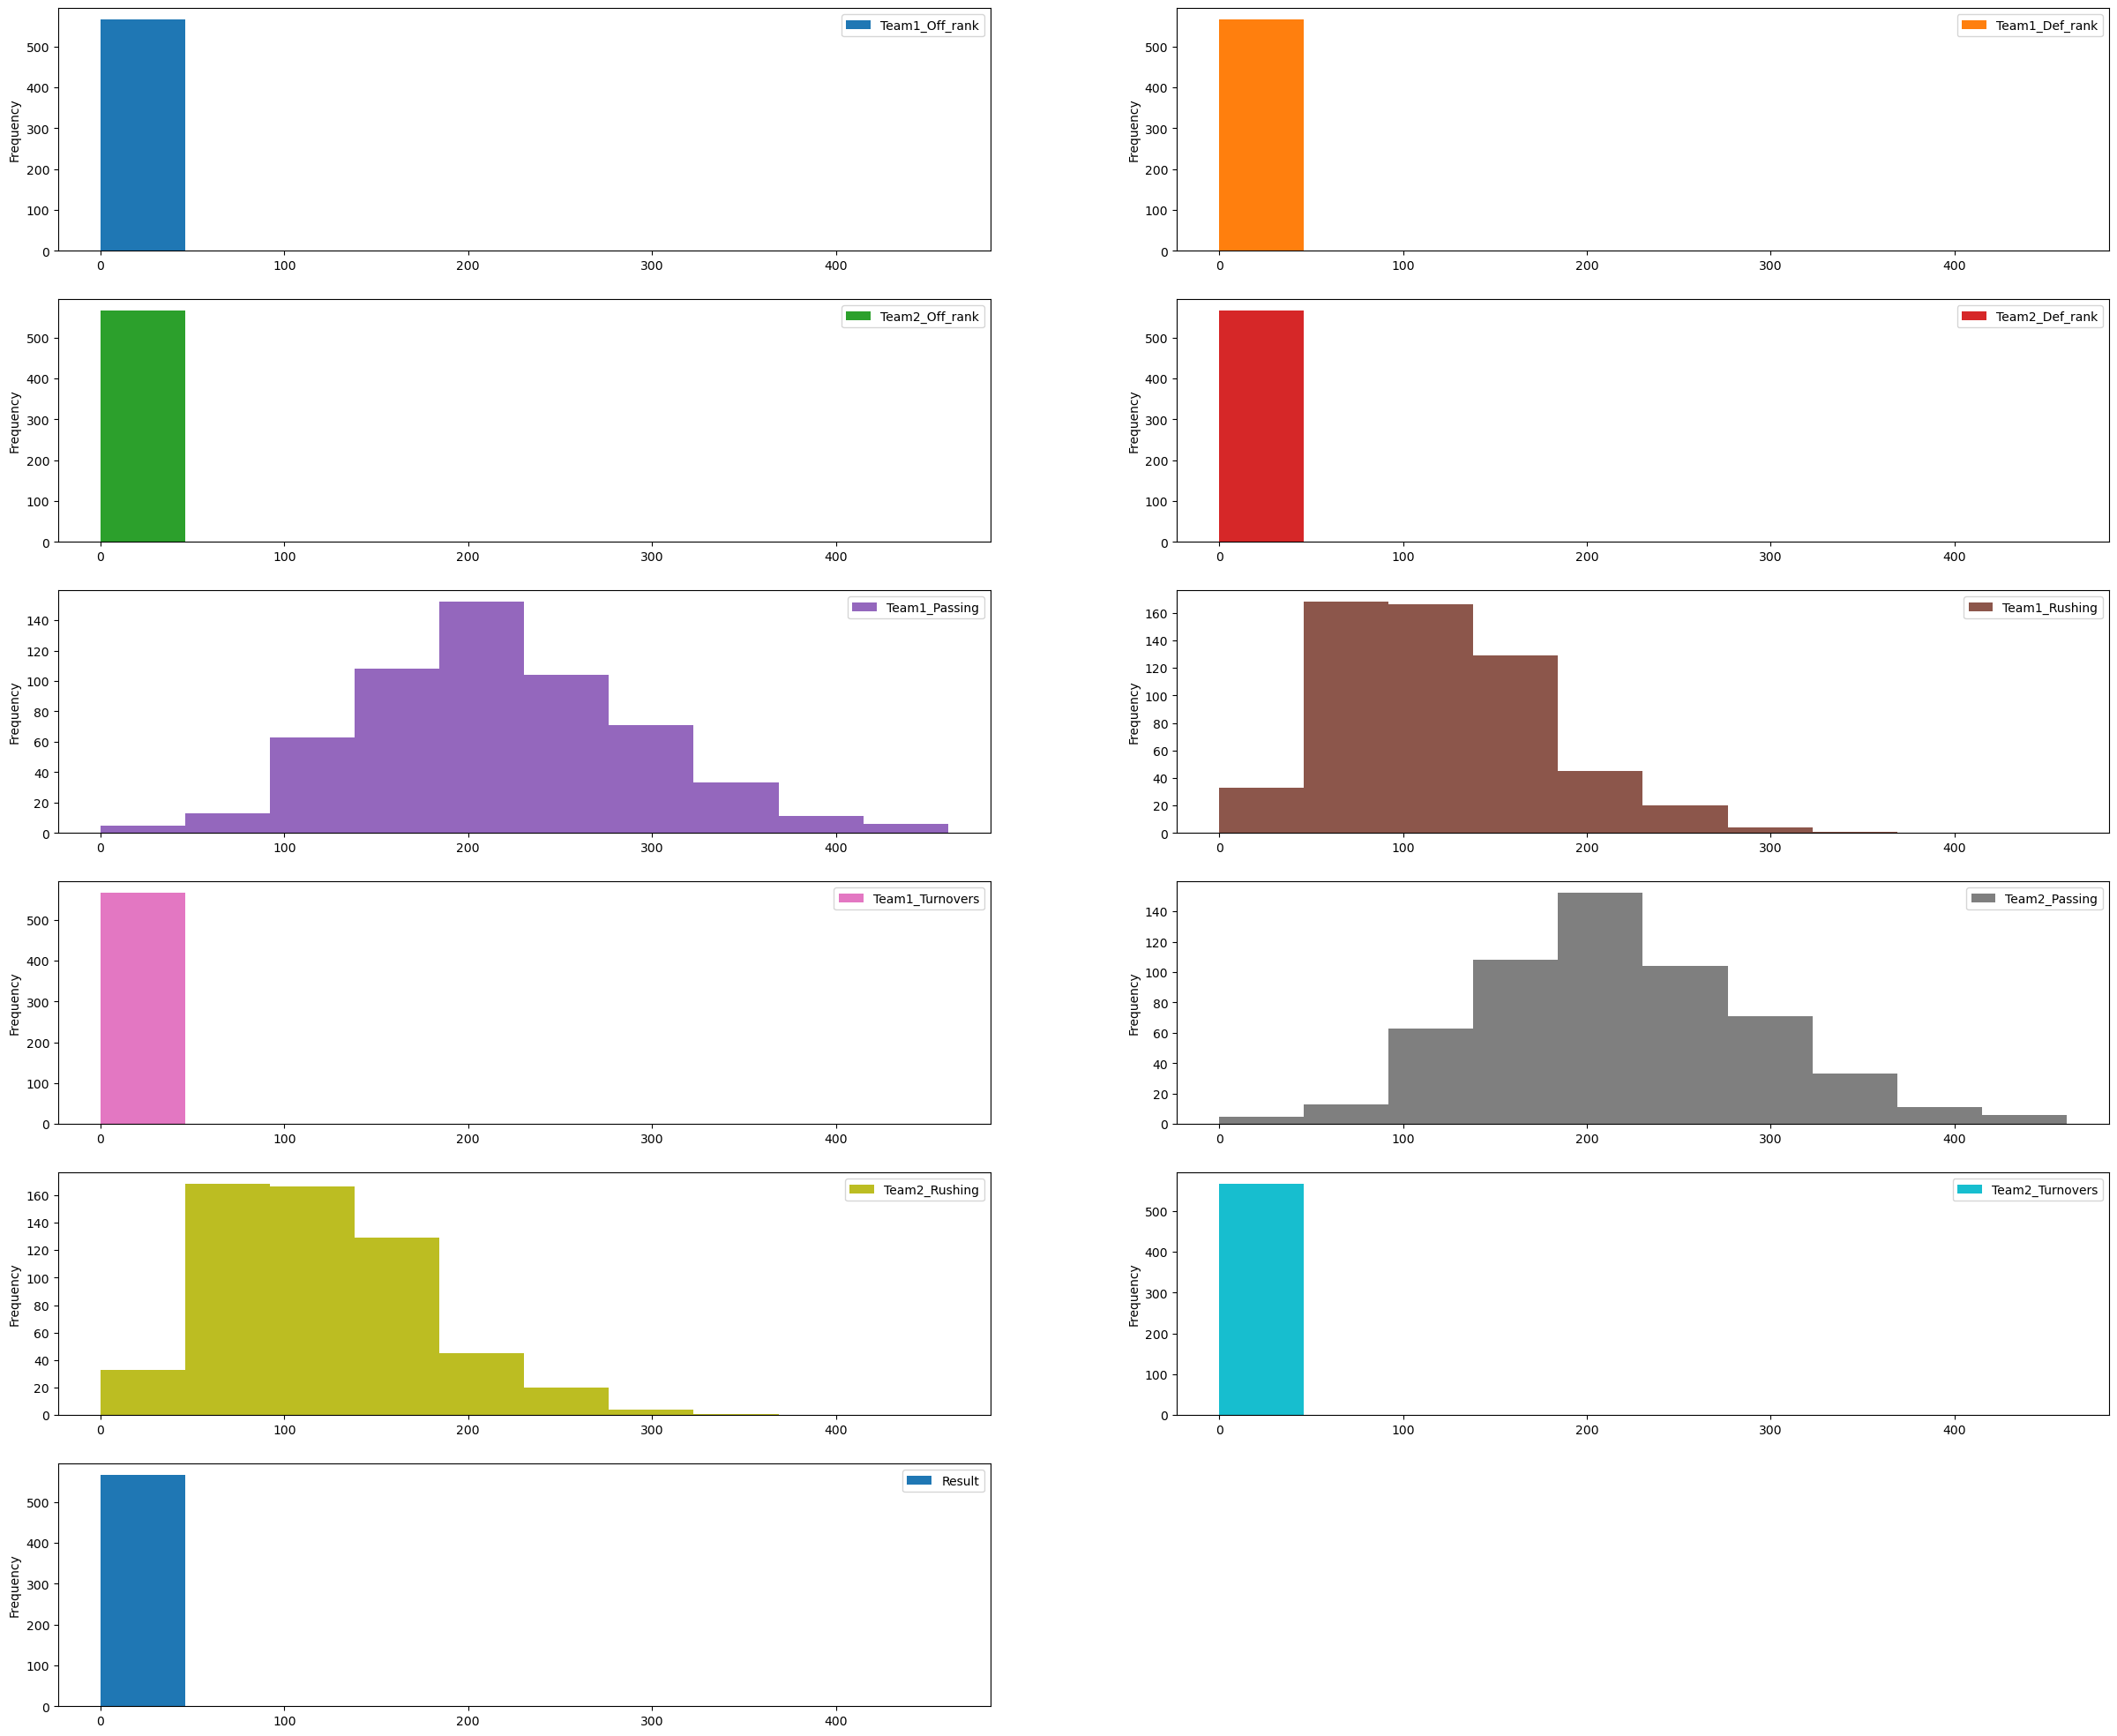

In [11]:
plt.rcParams['figure.figsize']=(30,25)

nfl2022.plot(kind='hist', bins=10, subplots=True, layout=(6,2), sharex=False, sharey=False)

plt.show()

In [12]:
correlation = nfl2022.corr()

In [13]:
correlation['Result'].sort_values(ascending=False)

Result             1.000000
Team2_Turnovers    0.370910
Team1_Rushing      0.298524
Team2_Off_rank     0.295869
Team2_Def_rank     0.205475
Team1_Passing      0.106903
Team2_Passing     -0.101469
Team1_Def_rank    -0.199055
Team1_Off_rank    -0.282041
Team2_Rushing     -0.294113
Team1_Turnovers   -0.371604
Name: Result, dtype: float64

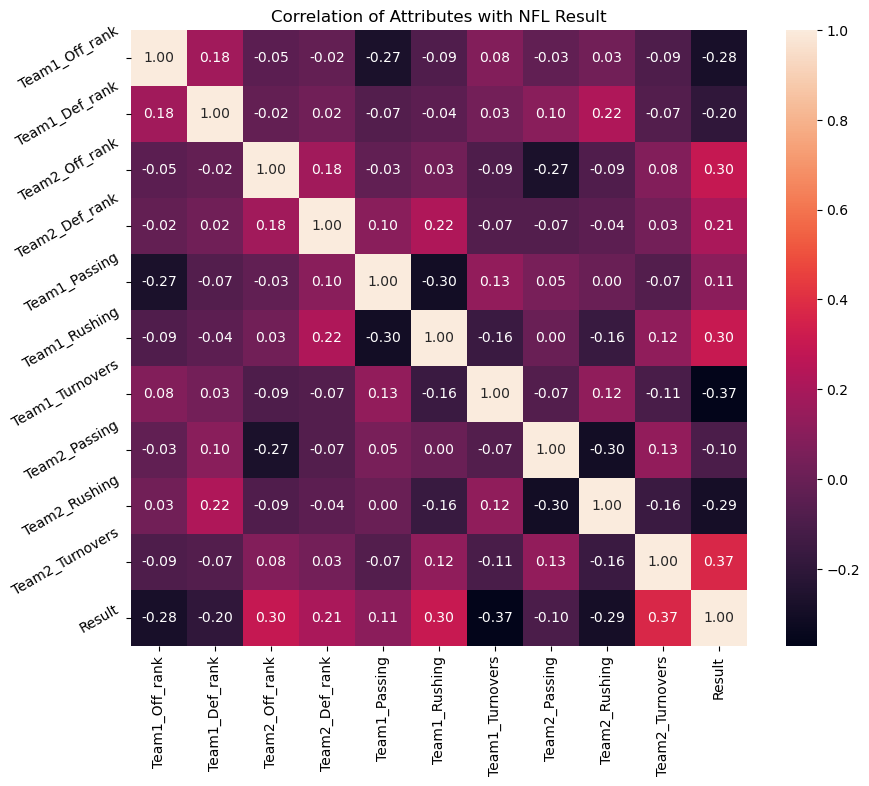

In [15]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with NFL Result')
corrmap = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
corrmap.set_xticklabels(corrmap.get_xticklabels(), rotation=90)
corrmap.set_yticklabels(corrmap.get_yticklabels(), rotation=30)           
plt.show()

In [19]:
x = nfl2022.drop('Result', axis=1)
y = nfl2022['Result']
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=.2,random_state=500)

In [65]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


knn = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    KNeighborsClassifier(n_neighbors=6)
)


knn.fit(train_x, train_y)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Team1', 'Location', 'Team2'],
                                mapping=[{'col': 'Team1',
                                          'data_type': dtype('O'),
                                          'mapping': Minnesota Vikings         1
Detroit Lions             2
Los Angeles Rams          3
Houston Texans            4
Dallas Co1boys            5
Ne1 England Patriots      6
Indianapolis Colts        7
San Francisco 49ers       8
Tennessee Titans          9
Tampa Bay Buccaneers     10
Miami Dolphins           11
Cincinnati Bengals       12
Ne1 Orleans Sa...
Kansas City Chiefs       19
Ne1 York Jets            20
Indianapolis Colts       21
Los Angeles Rams         22
Minnesota Vikings        23
Cleveland Bro1ns         24
Ne1 England Patriots     25
Philadelphia Eagles      26
Tampa Bay Buccaneers     27
Ne1 Orleans Saints       28
Houston Texans           29
Jacksonville Jaguars     30
Detroit Lions            31


In [66]:
y_pred = knn.predict(test_x)
y_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0])

In [81]:
# Probablity of Win
win = knn.predict_proba(test_x)[:,0]

In [82]:
# Probability of Lose
lose = knn.predict_proba(test_x)[:,1]

In [69]:
from sklearn.metrics import accuracy_score
print('KNN accuracy score: {0:0.4f}'. format(accuracy_score(test_y, y_pred)))

KNN accuracy score: 0.6754


In [70]:
y_pred_train = knn.predict(train_x)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(train_y, y_pred_train)))

Training-set accuracy score: 0.7434


In [71]:
print('Training set score: {:.4f}'.format(knn.score(train_x, train_y)))
print('Test set score: {:.4f}'.format(knn.score(test_x, test_y)))

Training set score: 0.7434
Test set score: 0.6754


In [72]:
from sklearn.metrics import classification_report

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.81      0.71        57
           1       0.74      0.54      0.63        57

    accuracy                           0.68       114
   macro avg       0.69      0.68      0.67       114
weighted avg       0.69      0.68      0.67       114



In [91]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(test_y, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.6754


In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)
cm

array([[46, 11],
       [26, 31]])

In [73]:
features = ['Team1','Team1_Off_rank','Team1_Def_rank','Location','Team2','Team2_Off_rank',
            'Team2_Def_rank','Team1_Passing','Team1_Rushing',
            'Team1_Turnovers','Team2_Passing','Team2_Rushing','Team2_Turnovers']

In [74]:
lineup = [['Kansas City Chiefs',1,16,'AWAY','Philadelphia Eagles',2,8,294.47,113.47,1.26,230.21,153.95,1]]
sb = pd.DataFrame(lineup, columns=features)
sb

,Team1,Team1_Off_rank,Team1_Def_rank,Location,Team2,Team2_Off_rank,Team2_Def_rank,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers
0,Kansas City Chiefs,1,16,AWAY,Philadelphia Eagles,2,8,294.47,113.47,1.26,230.21,153.95,1


In [75]:
# Predict the matching result
knn.predict_proba(sb)

array([[0.66666667, 0.33333333]])

In [78]:
lineup2 = [['Kansas City Chiefs',1,16,'AWAY','Philadelphia Eagles',2,8,290.15,118.23,1,232.44,121.33,1.11]]
sb2 = pd.DataFrame(lineup2, columns=features)
sb2

,Team1,Team1_Off_rank,Team1_Def_rank,Location,Team2,Team2_Off_rank,Team2_Def_rank,Team1_Passing,Team1_Rushing,Team1_Turnovers,Team2_Passing,Team2_Rushing,Team2_Turnovers
0,Kansas City Chiefs,1,16,AWAY,Philadelphia Eagles,2,8,290.15,118.23,1,232.44,121.33,1.11


In [79]:
knn.predict_proba(sb2)

array([[0.33333333, 0.66666667]])